In [2]:
! pip install scikit-plot
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics 



In [13]:
mobile_tr=pd.read_csv("train.csv")
mobile_te=pd.read_csv("test.csv")

In [11]:
print(mobile_tr.shape)
mobile_tr.info()

(2000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 1

In [14]:
print(mobile_te.shape)
mobile_te.info()

(1000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18

In [ ]:
# We don't have any NAs. That's great!
# Next drop the duplicates.

In [18]:
mobile_tr.drop_duplicates(inplace=True)
mobile_te.drop_duplicates(inplace=True)

In [16]:
#Confirm if we have missing data
mobile_tr.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [19]:
mobile_te.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

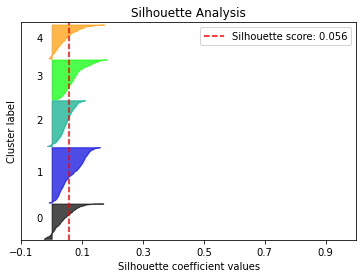

In [24]:
# standardize in a one liner
ds = StandardScaler().fit_transform(mobile_tr)
# lets fit kmeans
k5 = KMeans(5)
k5_labs = k5.fit_predict(ds)

# plot
skplt.metrics.plot_silhouette(ds, k5_labs)

In [49]:
merged= pd.concat([mobile_te,mobile_tr])
print(merged.shape)
merged.info()

(3000, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   float64
 1   battery_power  3000 non-null   int64  
 2   blue           3000 non-null   int64  
 3   clock_speed    3000 non-null   float64
 4   dual_sim       3000 non-null   int64  
 5   fc             3000 non-null   int64  
 6   four_g         3000 non-null   int64  
 7   int_memory     3000 non-null   int64  
 8   m_dep          3000 non-null   float64
 9   mobile_wt      3000 non-null   int64  
 10  n_cores        3000 non-null   int64  
 11  pc             3000 non-null   int64  
 12  px_height      3000 non-null   int64  
 13  px_width       3000 non-null   int64  
 14  ram            3000 non-null   int64  
 15  sc_h           3000 non-null   int64  
 16  sc_w           3000 non-null   int64  
 17  talk_time      3000 non-null   int64  
 1

In [50]:
merged.drop(['id', 'price_range'], axis=1, inplace=True)


In [51]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_sc

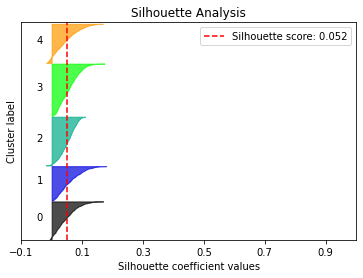

In [52]:
# standardize in a one liner
ds = StandardScaler().fit_transform(merged)
# lets fit kmeans
k5 = KMeans(5)
k5_labs = k5.fit_predict(ds)

# plot
skplt.metrics.plot_silhouette(ds, k5_labs)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



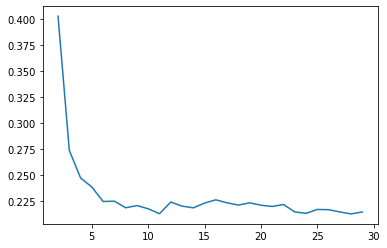

In [53]:
# Kmeans for test dataset
KRANGE = range(2, 30)
# containers
ss = []


for k in KRANGE:
 km = KMeans(k)
 lab = km.fit_predict(merged)
 ss.append(metrics.silhouette_score(merged, lab))
# the plot 
sns.lineplot(KRANGE, ss)
